In [6]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#read Cancer Data Useing Pandas Library
data=pd.read_csv("cancer data.csv")
data.head()


,mean radius,mean texture,mean area,mean concavity,mean symmetry,mean fractal dimension,texture error,perimeter error,concave points error,worst radius,worst perimeter,worst area,worst compactness,benign_0__mal_1
0,17.99,10.38,1001.0,0.3001,0.2419,0.07871,0.9053,8.589,0.01587,25.38,184.60,2019.0,0.6656,0
1,20.57,17.77,1326.0,0.0869,0.1812,0.05667,0.7339,3.398,0.01340,24.99,158.80,1956.0,0.1866,0
2,19.69,21.25,1203.0,0.1974,0.2069,0.05999,0.7869,4.585,0.02058,23.57,152.50,1709.0,0.4245,0
3,11.42,20.38,386.1,0.2414,0.2597,0.09744,1.1560,3.445,0.01867,14.91,98.87,567.7,0.8663,0
4,20.29,14.34,1297.0,0.1980,0.1809,0.05883,0.7813,5.438,0.01885,22.54,152.20,1575.0,0.2050,0


In [8]:
#Data Information
print(data.keys())
data.info()

Index(['mean radius', 'mean texture', 'mean area', 'mean concavity',
       'mean symmetry', 'mean fractal dimension', 'texture error',
       'perimeter error', 'concave points error', 'worst radius',
       'worst perimeter', 'worst area', 'worst compactness',
       'benign_0__mal_1'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean radius             564 non-null    float64
 1   mean texture            562 non-null    float64
 2   mean area               559 non-null    float64
 3   mean concavity          555 non-null    float64
 4   mean symmetry           555 non-null    float64
 5   mean fractal dimension  543 non-null    float64
 6   texture error           542 non-null    float64
 7   perimeter error         556 non-null    float64
 8   concave points error    556 non-null    float64


<AxesSubplot:>

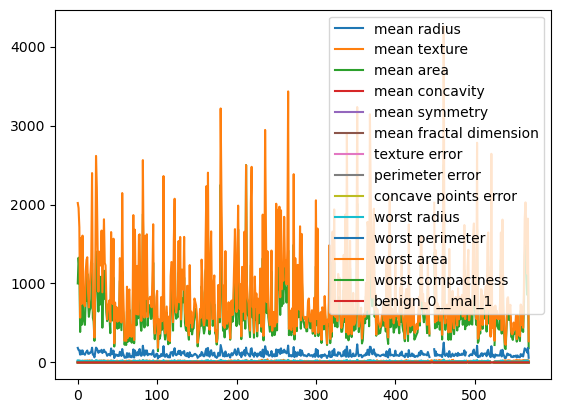

In [9]:
data.plot()

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

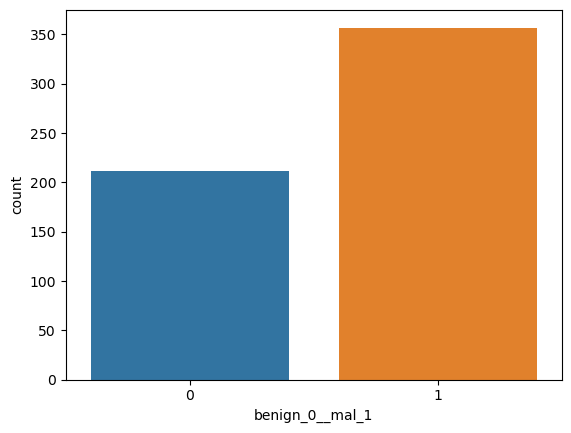

In [10]:
#countplot of Output Variable
sns.countplot(data['benign_0__mal_1'])

In [11]:
#cheacking Nan or Null data in dataset
data.isnull().sum()

mean radius                5
mean texture               7
mean area                 10
mean concavity            14
mean symmetry             14
mean fractal dimension    26
texture error             27
perimeter error           13
concave points error      13
worst radius              13
worst perimeter            8
worst area                 5
worst compactness          0
benign_0__mal_1            0
dtype: int64

<AxesSubplot:>

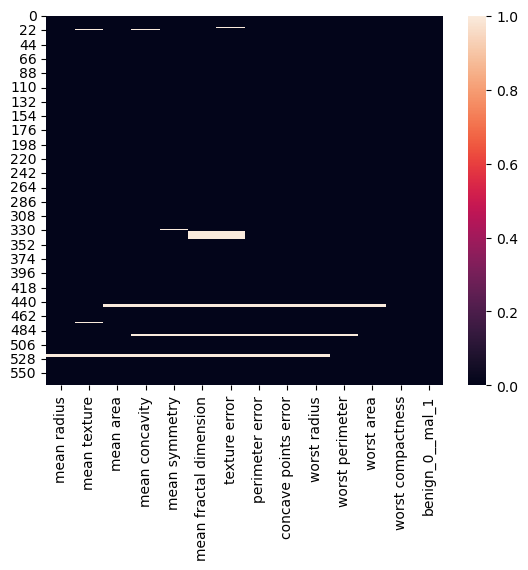

In [12]:
#Nan data or Null Data Visualization Using Heatmap
sns.heatmap(data.isnull())

In [13]:
#clean Data 
data1=data.dropna(axis=0)
data1.isnull().sum()

mean radius               0
mean texture              0
mean area                 0
mean concavity            0
mean symmetry             0
mean fractal dimension    0
texture error             0
perimeter error           0
concave points error      0
worst radius              0
worst perimeter           0
worst area                0
worst compactness         0
benign_0__mal_1           0
dtype: int64

(569, 14)

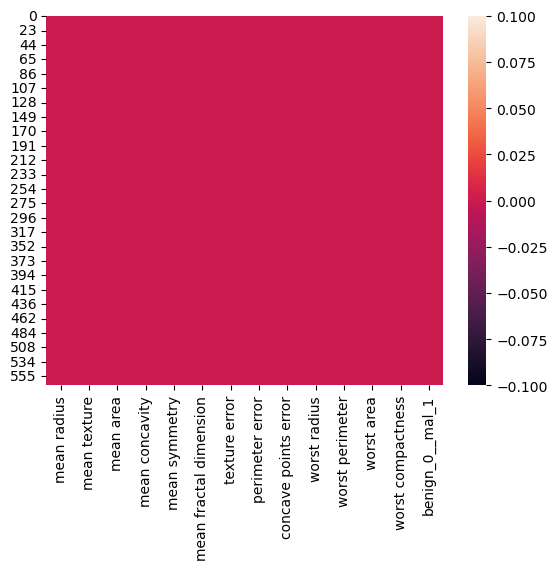

In [14]:
#clean data Visualization
sns.heatmap(data1.isnull())
data.shape

### Feature Selection

In [15]:
#Inpute Variables 12
x=data1.iloc[:,0:13].values

#output Variable Benign Or Mal
y=data1.iloc[:,13:].values

#shape of the input and Output Varibale
print("shape of the input Var",x.shape)


print("shape of the output Va",y.shape)

shape of the input Var (539, 13)
shape of the output Va (539, 1)


### DATA Spliting

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_test[5]

(404, 13)
(135, 13)
(404, 1)
(135, 1)


array([2.811e+01, 1.847e+01, 2.499e+03, 3.201e-01, 1.648e-01, 5.525e-02,
       1.476e+00, 2.198e+01, 1.407e-02, 2.811e+01, 1.885e+02, 2.499e+03,
       1.516e-01])

### Model Training Using DT,RF,KNN,SVM

In [30]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
Dt=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None, min_samples_split=2,min_samples_leaf=1,)
Dt.fit(x_train,y_train)
dt_score=Dt.score(x_test,y_test)*100
print("Accuracy of the Model Is ------>>",dt_score,"%")
pread=Dt.predict(x_test)

fram={'actual_value':[y_test[9]],
      'predicted_value':[pread[9]]}
all1=pd.DataFrame(fram)
all1.head()

Accuracy of the Model Is ------>> 88.14814814814815 %


,actual_value,predicted_value
0,[0],0


In [31]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier( n_estimators=100,criterion='gini',max_depth=None, min_samples_split=2,min_samples_leaf=1 )
rf.fit(x_train,y_train)
rf_score=rf.score(x_train,y_train)*100
print("Accuracy Of Random forest------->>>",rf_score,"%")
rf.predict(x_test)

Accuracy Of Random forest------->>> 100.0 %


array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1], dtype=int64)

In [34]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=3)
knn.fit(x_train,y_train)
knn_score=knn.score(x_train,y_train)*100
print("Accuracy of the KNN",knn_score,"k")
knn.predict(x_test)


Accuracy of the KNN 94.05940594059405 k


array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1], dtype=int64)

In [53]:
#Svm
from sklearn.svm import SVC
svc=SVC(C=1.0,kernel='rbf')
svc.fit(x_train,y_train)
svc_score=svc.score(x_train,y_train)
print("Accuracy Of SVM Is------>>>",svc_score*100,"%")
svc.predict(x_test)

Accuracy Of SVM Is------>>> 91.83168316831683 %


array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1], dtype=int64)

In [49]:
df={"Model_Name":["Decision Tree","Random Forest","KNN","SVM"],
    "Accuracy":[dt_score,rf_score,knn_score,svc_score]}
pd.DataFrame(df)

,Model_Name,Accuracy
0,Decision Tree,89.629630
1,Random Forest,100.000000
2,KNN,94.059406
3,SVM,0.918317


### Best Accuracy Model Saved (RF Model)

In [51]:
import joblib
joblib.dump(rf,"model.pkl")

['model.pkl']

In [52]:
model=joblib.load("model.pkl")
model.predict(x_test)

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1], dtype=int64)